#### Importing Modules

In [189]:
from dataclasses import dataclass, asdict
from dataclass_csv import DataclassReader
from typing import Optional
from enum import Enum
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the Data

In [149]:
class InfillPattern(Enum):
    GRID = "grid"
    HONEYCOMB = "honeycomb"

In [150]:
class Material(Enum):
    ABS = "abs"
    PLA = "pla"

In [151]:
@dataclass
class ThreeDPrinterData:
    layer_height: float
    wall_thickness: int
    infill_density: int
    infill_pattern: InfillPattern
    nozzle_temperature: int
    bed_temperature: int
    print_speed: int
    material: Material
    fan_speed: int
    roughness: int
    tensile_strength: int
    elongation: float

In [152]:
FILENAME = './3dprinterdata_edited.csv'

In [180]:
def readCSVData(flname):
    with open(flname) as data_csv:
        reader = DataclassReader(data_csv, ThreeDPrinterData)
        reader.map('Tensile Strength').to('tensile_strength')
        reader.map('Elongation').to('elongation')
        data_objects = []
        for row in reader:
            data_objects.append(row)
    
    df = pd.DataFrame(data_objects)
    df['infill_pattern'] = df['infill_pattern'].map(lambda obj: obj.value)
    df['material'] = df['material'].map(lambda obj: obj.value)
    
    return df

In [181]:
df = readCSVData(FILENAME)

#### Exploratory Data Analysis

In [243]:
class GeneralStatistics:
    def __init__(self, data):
        self.data = data
        
    def counts(self):
        print("There are {} datapoints and {} features".format(self.data.shape[0], self.data.shape[1]))
        
    def isNull(self):
        total = sum(self.data.isnull().sum())
        print("There are {} null values in the dataset".format(total))
        
    def descriptiveStats(self):
        print("\nThis is the mean value of all the variables\n\n")
        return self.data.describe().T['mean']
    
    def pairwiseCorrelation(self):
        #plt.figure(figsize = (12, 12))
        sns.heatmap(self.data.corr(), cbar = True, annot = True, cmap = 'Blues')

There are 46 datapoints and 12 features
There are 0 null values in the dataset

This is the mean value of all the variables




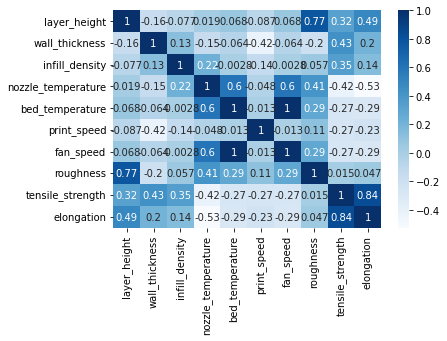

In [244]:
statsObj = GeneralStatistics(df)
statsObj.counts()
statsObj.isNull()
statsObj.descriptiveStats()
statsObj.pairwiseCorrelation()

##### Some general insights -
A good start is to look at some descriptive statistics -

1. There are in total 46 datapoints
2. There are two categorical variables which need to be one-hot encoded
3. The mean of each term shows that the data needs to be normalized before the model is trained.

<AxesSubplot:>

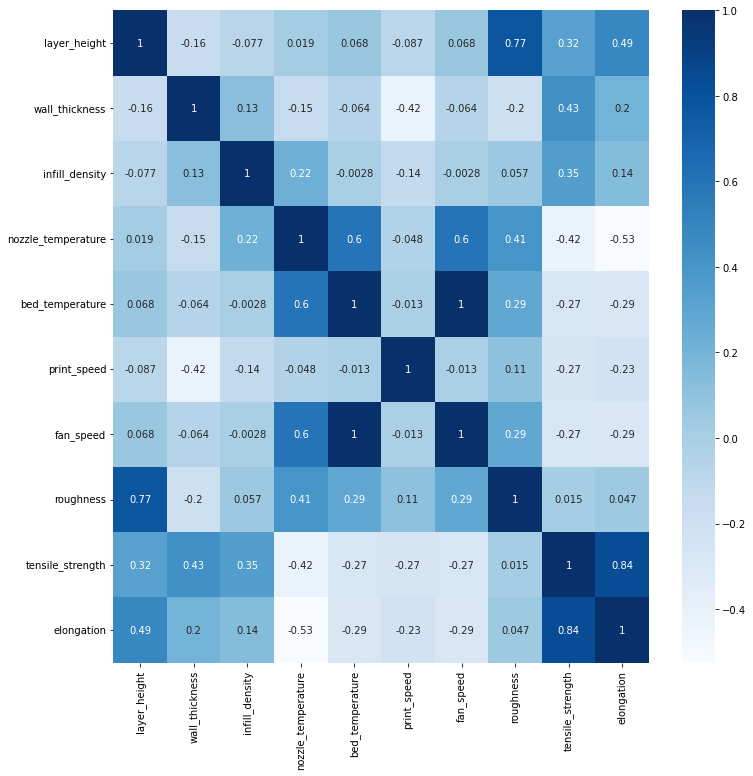

In [197]:
# Correlation between different variables
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), cbar = True, annot = True, cmap = 'Blues')